In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/ipl.csv')
data.shape

(76014, 15)

In [3]:
data.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


In [4]:
# remoing cols as it doesnt contribute to algorithm
cols_to_remove = ['mid', 'striker', 'non-striker', 'venue', 'batsman', 'bowler']
data.drop(labels=cols_to_remove, axis=1, inplace=True)

In [5]:
data.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


In [6]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
selected_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians',
                 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [8]:
# Keeping only the current team that are playing
print('Number of rows before removing the teams:',data.shape[0])
data = data[data['bat_team'].isin(selected_team) & data['bowl_team'].isin(selected_team)]
print('Number of rows after removing the teams:',data.shape[0])

Number of rows before removing the teams: 76014
Number of rows after removing the teams: 53811


In [9]:
# Removing the super overs
print('Number of rows before removing the teams:',data.shape[0])
data = data[data['overs'] > 6.0]
print('Number of rows after removing the teams:',data.shape[0])

Number of rows before removing the teams: 53811
Number of rows after removing the teams: 37371


In [10]:
# check for null values percentage
data.isnull().mean()*100

date              0.0
bat_team          0.0
bowl_team         0.0
runs              0.0
wickets           0.0
overs             0.0
runs_last_5       0.0
wickets_last_5    0.0
total             0.0
dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37371 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            37371 non-null  object 
 1   bat_team        37371 non-null  object 
 2   bowl_team       37371 non-null  object 
 3   runs            37371 non-null  int64  
 4   wickets         37371 non-null  int64  
 5   overs           37371 non-null  float64
 6   runs_last_5     37371 non-null  int64  
 7   wickets_last_5  37371 non-null  int64  
 8   total           37371 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ MB


In [12]:
# Formating the date field
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
data['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 37371 entries, 38 to 75888
Series name: date
Non-Null Count  Dtype         
--------------  -----         
37371 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 583.9 KB


In [14]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [15]:
# one hot encoding for the model
df = pd.get_dummies(data=data, columns=['bat_team','bowl_team'])
df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37371 entries, 38 to 75888
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   37371 non-null  datetime64[ns]
 1   runs                                   37371 non-null  int64         
 2   wickets                                37371 non-null  int64         
 3   overs                                  37371 non-null  float64       
 4   runs_last_5                            37371 non-null  int64         
 5   wickets_last_5                         37371 non-null  int64         
 6   total                                  37371 non-null  int64         
 7   bat_team_Chennai Super Kings           37371 non-null  uint8         
 8   bat_team_Delhi Daredevils              37371 non-null  uint8         
 9   bat_team_Kings XI Punjab               37371 non-null  uint8

In [17]:
# spliting the data
x_train = df.drop(labels='total', axis=1)[df['date'].dt.year <= 2016]
x_test = df.drop(labels='total', axis=1)[df['date'].dt.year >= 2017]

y_train = df[df['date'].dt.year <= 2016]['total'].values
y_test = df[df['date'].dt.year >= 2017]['total'].values

In [18]:
# drop date field
x_train.drop(labels='date', axis=1, inplace=True)
x_test.drop(labels='date', axis=1, inplace=True)

In [27]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
# parameters for model
lasso = Lasso()
params = {'alpha': [1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [35]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [33]:
# Gridsearch
lasso_regressor = GridSearchCV(lasso, params,
                               scoring='neg_mean_squared_error',
                               cv=5)

In [34]:
# model fitting
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [37]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [38]:
# building model on best param
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [39]:
# model prediction
y_pred = lasso.predict(x_test)
y_pred

array([178.83590396, 178.14160116, 177.96888293, ..., 106.24884666,
       105.26936234,  99.57954234])

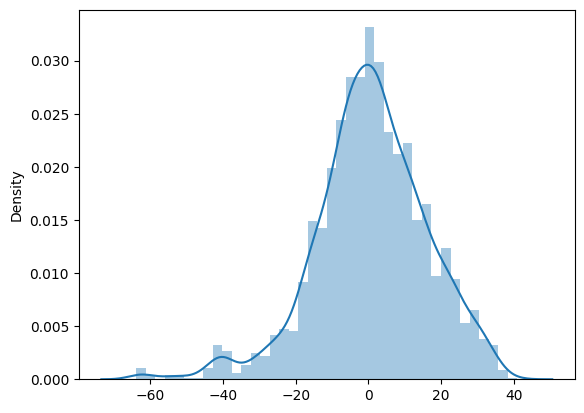

In [40]:
# dist plot for difference
sns.distplot(y_test - y_pred)
plt.show()

In [46]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred)*100)
print()
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 11.785919220414247

MAPE: 8.108048208945021

MSE: 240.39922270658536

RMSE: 15.504812888473868


In [49]:
print('Accuracy:',metrics.r2_score(y_test, y_pred))

Accuracy: 0.7618370765953089


In [50]:
# Auto ML model - TPOT
! pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=9ec1d763b77900cf349762a62d18a3475cf421ef6bcaa9893eb13f04009cb9b1
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [52]:
# understanding tpot
import tpot
print(tpot.__version__)

0.12.1


In [53]:
# functions / modules inside tpot
print(dir(tpot))

['TPOTClassifier', 'TPOTRegressor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'base', 'builtins', 'config', 'decorators', 'driver', 'export_utils', 'gp_deap', 'gp_types', 'main', 'metrics', 'operator_utils', 'tpot']


In [54]:
# Regression Problem
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold

In [55]:
# Data evaluation procedure
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state=42)

In [56]:
# define the model
model = TPOTRegressor(generations=5, population_size=20,
                      scoring='neg_mean_squared_error',
                      cv= cv, n_jobs=-1,
                      random_state=42, verbosity=3)

In [57]:
# model fitting
model.fit(x_train, y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

Skipped pipeline #20 due to time out. Continuing to the next pipeline.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'quantile', 'huber', 'absolute_error'}. Got 'ls' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	-124.94847130879336	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6,

TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=42),
              generations=5, n_jobs=-1, population_size=20, random_state=42,
              scoring='neg_mean_squared_error', verbosity=3)

In [58]:
print(model.score(x_test, y_test))

-321.9277629097879


In [59]:
model.fitted_pipeline_

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_features=0.7500000000000001,
                                       min_samples_split=9, random_state=42))])

In [60]:
pred_automl = model.predict(x_test)

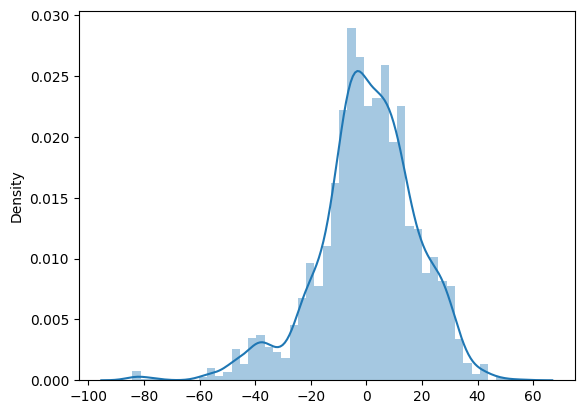

In [61]:
# dist plot for difference
sns.distplot(y_test - pred_automl)
plt.show()

In [62]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, pred_automl))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, pred_automl)*100)
print()
print("MSE:", metrics.mean_squared_error(y_test, pred_automl))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_automl)))

MAE: 13.58833989230057

MAPE: 9.027146927143885

MSE: 321.9277629097879

RMSE: 17.942345524200224


In [64]:
print('Accuracy:',metrics.r2_score(y_test, pred_automl))

Accuracy: 0.6810669507309224
